In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from itertools import product
from sklearn.metrics import silhouette_score

warnings.filterwarnings("ignore", category=FutureWarning)

In [100]:
df_r0 = pd.read_csv("penguins.csv")
df_r1=df_r0.dropna()
df_r1

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,FEMALE
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        335.000000       335.000000         335.000000   335.000000
mean          43.988358        17.169552         214.355224  4209.179104
std            5.453430         1.971966         263.253508   803.633495
min           32.100000        13.100000        -132.000000  2700.000000
25%           39.500000        15.600000         190.000000  3550.000000
50%           44.500000        17.300000         197.000000  4050.000000
75%           48.550000        18.700000         213.000000  4787.500000
max           59.600000        21.500000        5000.000000  6300.000000


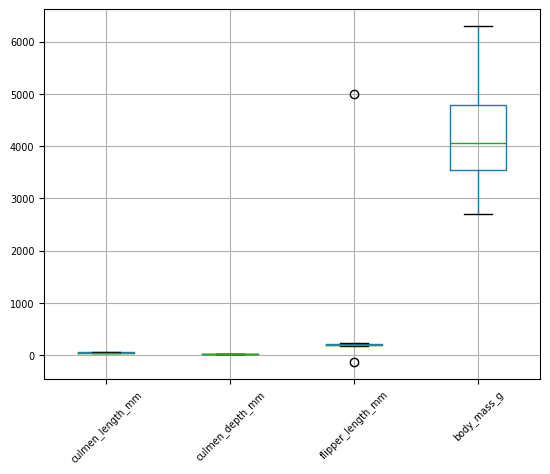

In [101]:
print(df_r1.describe())

df_r1_boxplot = df_r1.boxplot(column=['culmen_length_mm','culmen_depth_mm',
                                      'flipper_length_mm','body_mass_g'], rot=45, fontsize=7)

plt.savefig('boxplot.jpg')
plt.show()

In [102]:
df_r2 = df_r1[df_r1["flipper_length_mm"]>0]
df_r3 = df_r2[df_r2["flipper_length_mm"]<5000]

df_r3.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,44.022523,17.148649,201.024024,4208.483483
std,5.444308,1.958940,14.042299,805.978992
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4800.000000
max,59.600000,21.500000,231.000000,6300.000000


In [103]:
df_c0 = df_r3.reset_index().drop('index', axis=1)

gender_check=0
for row in range(len(df_c0)):
    if df_c0['sex'][row] != 'FEMALE' and df_c0['sex'][row] != 'MALE':
        gender_check=row
        
i=df_c0[((df_c0.sex != 'FEMALE') & (df_c0.sex != 'MALE'))].index

df_c0 = df_c0.drop(i)
df_c0 = df_c0.reset_index().drop('index', axis=1)

df_c0

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...
327,47.2,13.7,214.0,4925.0,FEMALE
328,46.8,14.3,215.0,4850.0,FEMALE
329,50.4,15.7,222.0,5750.0,MALE
330,45.2,14.8,212.0,5200.0,FEMALE


In [104]:
df = pd.get_dummies(df_c0)
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True
1,39.5,17.4,186.0,3800.0,True,False
2,40.3,18.0,195.0,3250.0,True,False
3,36.7,19.3,193.0,3450.0,True,False
4,39.3,20.6,190.0,3650.0,False,True
...,...,...,...,...,...,...
327,47.2,13.7,214.0,4925.0,True,False
328,46.8,14.3,215.0,4850.0,True,False
329,50.4,15.7,222.0,5750.0,False,True
330,45.2,14.8,212.0,5200.0,True,False


In [105]:
sex_FEMALE=[]
sex_MALE=[]

for row in range(len(df)):
    if df['sex_FEMALE'][row] == True: sex_FEMALE.append(1)
    else: sex_FEMALE.append(0)
    if df['sex_MALE'][row] == True: sex_MALE.append(1)
    else: sex_MALE.append(0)
        
df = df.drop(['sex_FEMALE','sex_MALE'], axis=1)
df['sex_FEMALE']=sex_FEMALE
df['sex_MALE']=sex_MALE

df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000
mean,44.021084,17.153012,200.975904,4206.475904,0.496988,0.503012
std,5.452462,1.960275,14.035971,806.361278,0.500746,0.500746
min,32.100000,13.100000,172.000000,2700.000000,0.000000,0.000000
25%,39.500000,15.600000,190.000000,3550.000000,0.000000,0.000000
50%,44.700000,17.300000,197.000000,4025.000000,0.000000,1.000000
75%,48.625000,18.700000,213.000000,4781.250000,1.000000,1.000000
max,59.600000,21.500000,231.000000,6300.000000,1.000000,1.000000


# Data Visualization

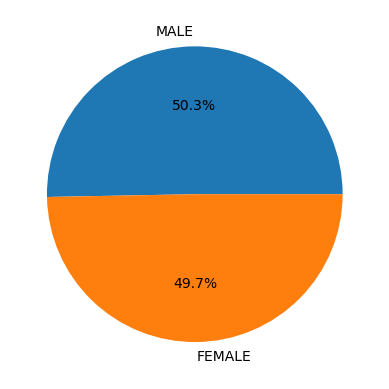

In [106]:
gender_count = [df['sex_MALE'].sum(), df['sex_FEMALE'].sum()]
gender_label = 'MALE','FEMALE'
fig, ax = plt.subplots()
ax.pie(gender_count, labels= gender_label, autopct='%1.1f%%')
plt.savefig('gender.jpg')
plt.show()

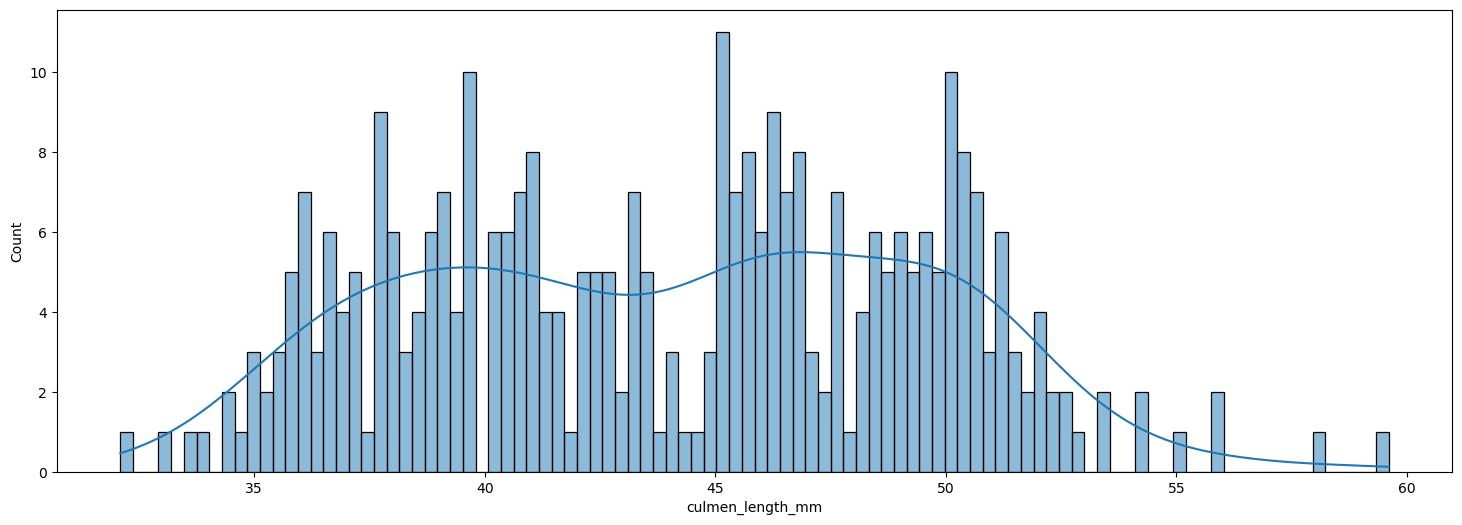

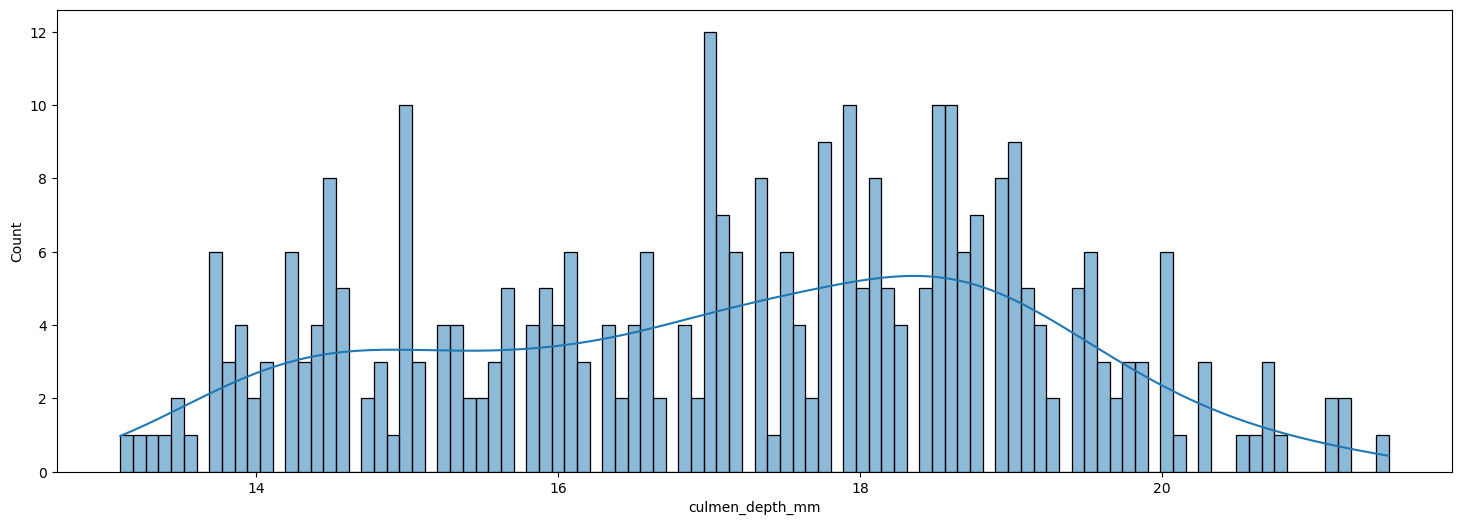

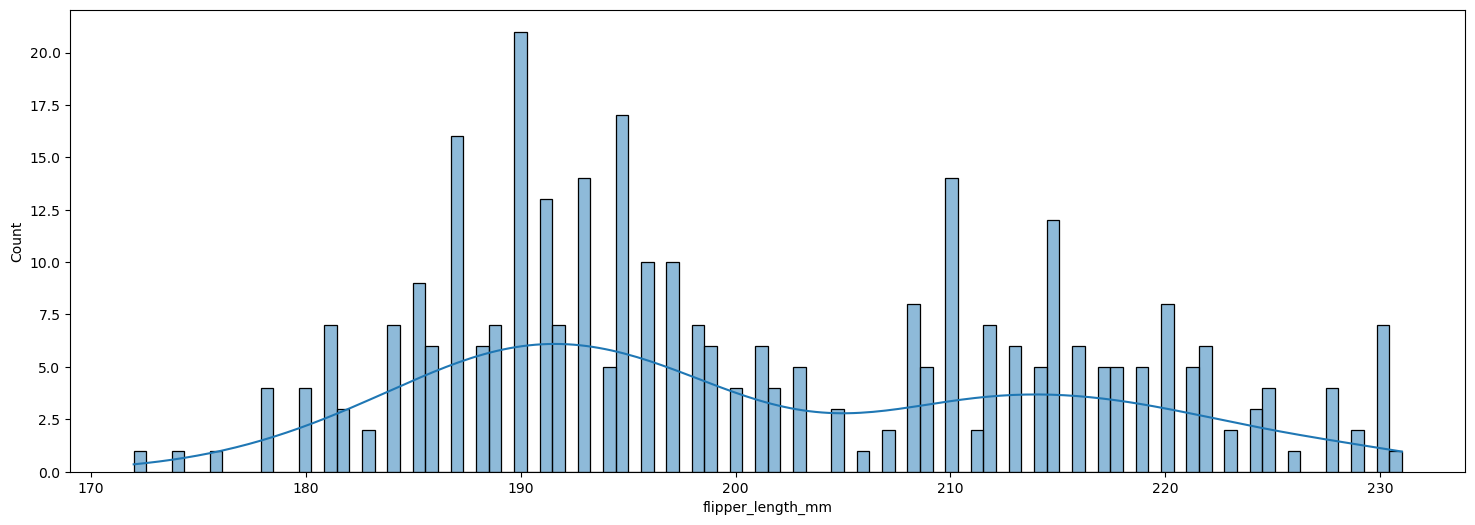

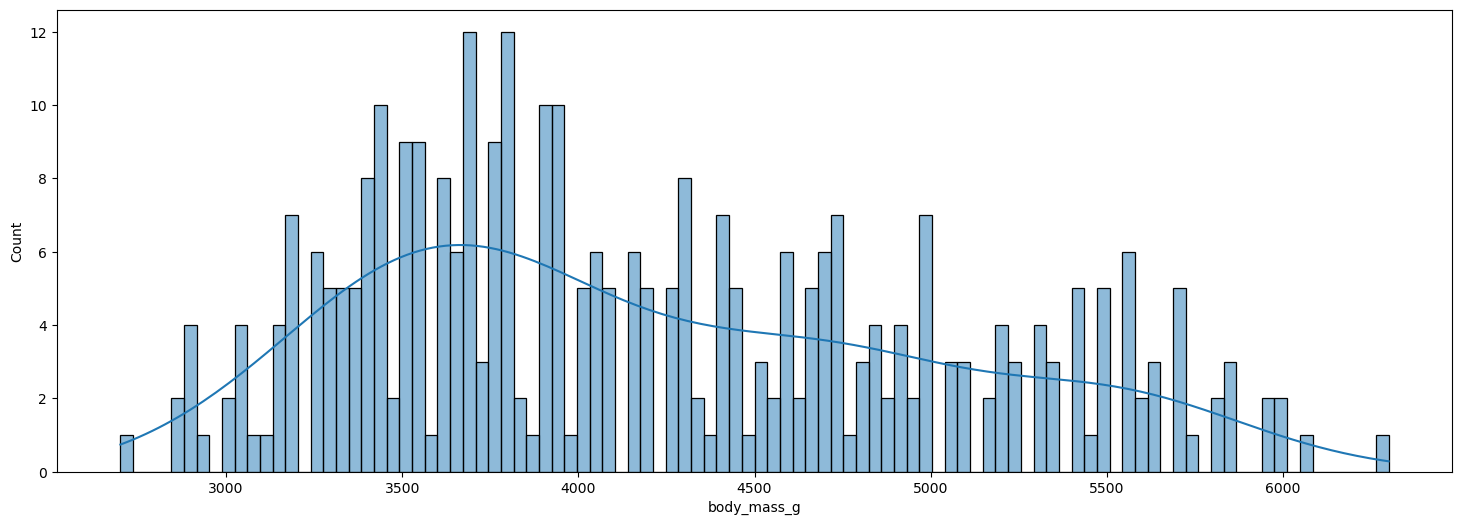

In [107]:
con_df = df[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']]

for col in con_df:
    fig,ax = plt.subplots(figsize=(18,6))
    fig = sns.histplot(data=con_df, x=col, bins=100, kde=True)
    plt.savefig(col + '.jpg')
    plt.show()

# Principal Component Analysis

In [108]:
sc = StandardScaler()
pca = PCA(n_components=None)

tran_df = sc.fit_transform(df)
df_good = pd.DataFrame(data=tran_df, columns=df.columns)
df_good

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.903906,0.790360,-1.425342,-0.566948,-0.993994,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,1.006042,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,1.006042,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,1.006042,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,-0.993994,0.993994
...,...,...,...,...,...,...
327,0.583904,-1.764152,0.929309,0.892415,1.006042,-1.006042
328,0.510432,-1.457611,1.000662,0.799264,1.006042,-1.006042
329,1.171681,-0.742347,1.500134,1.917074,-0.993994,0.993994
330,0.216543,-1.202160,0.786603,1.233968,1.006042,-1.006042


In [109]:
pca_fit0 = pca.fit(df_good)
n_pca=0
for i in range(len(pca_fit0.explained_variance_ratio_)): 
    if sum(pca_fit0.explained_variance_ratio_[:i])>0.95:
        n_pca=i
        break
        
pca = PCA(n_components=n_pca)
pca_fit = pca.fit_transform(df_good)

print("The number of principal axis choosed:", n_pca)
print("The proportion of the total variance can be explained:",
      sum(pca_fit0.explained_variance_ratio_[:n_pca]))

The number of principal axis choosed: 3
The proportion of the total variance can be explained: 0.9508274204210622


# K-Means

C:\Users\thp12\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\thp12\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\thp12\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\thp12\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

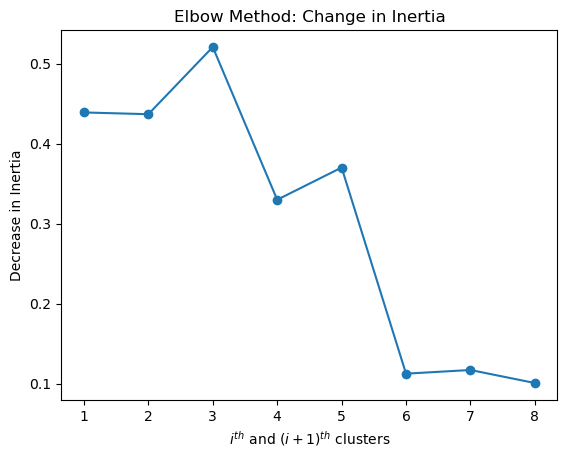

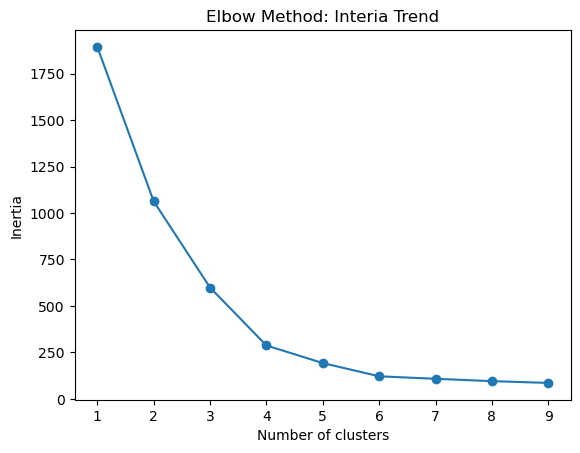

The cluster number is determined as: 6


In [110]:
inertia = []
in_diff = []
for k in range(1,10):
    km_fit = KMeans(n_clusters=k, random_state=42).fit(pca_fit)
    inertia.append(km_fit.inertia_)

for diff in range(0,len(inertia)-1):
    in_diff.append((inertia[diff] - inertia[diff+1])/inertia[diff])

plt.plot(range(1, 9), in_diff, marker="o")
plt.xlabel("$i^{th}$ and $(i+1)^{th}$ clusters")
plt.ylabel("Decrease in Inertia")
plt.title("Elbow Method: Change in Inertia")
plt.savefig('Change_in_Inertia.jpg')
plt.show()
    
plt.plot(range(1, 10), inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method: Interia Trend")
plt.savefig('Interia_Trend.jpg')
plt.show()

n = 0

for j in range(len(in_diff)):
    if in_diff[j] < 0.15:
        n = j+1
        break
print('The cluster number is determined as:', n)

C:\Users\thp12\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


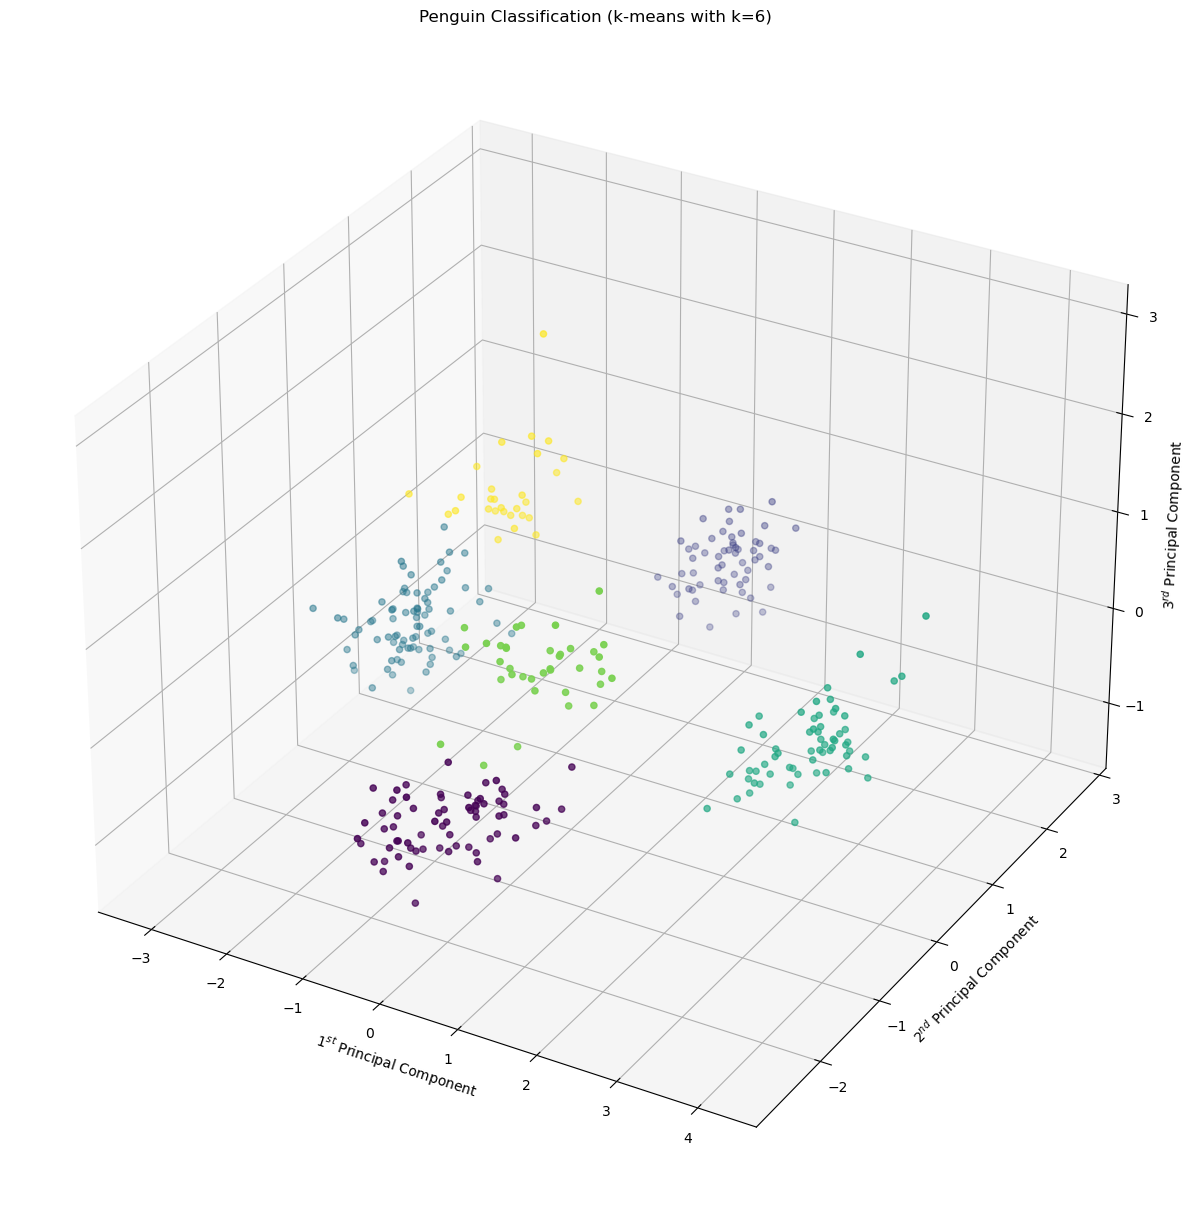

In [111]:
km_best = KMeans(n_clusters=n, random_state=42).fit(pca_fit)

fig = plt.figure(figsize = (12, 12), constrained_layout=True)
ax = fig.add_subplot(projection ="3d")

ax.scatter(pca_fit[:, 0], pca_fit[:, 1], pca_fit[:, 2], c=km_best.labels_, cmap="viridis")
plt.title("simple 3D scatter plot")

ax.set_xlabel("$1^{st}$ Principal Component")
ax.set_ylabel("$2^{nd}$ Principal Component")
ax.set_zlabel("$3^{rd}$ Principal Component")
plt.title(f"Penguin Classification (k-means with k={n})")
plt.savefig('3d_kmean.jpg')
plt.show()

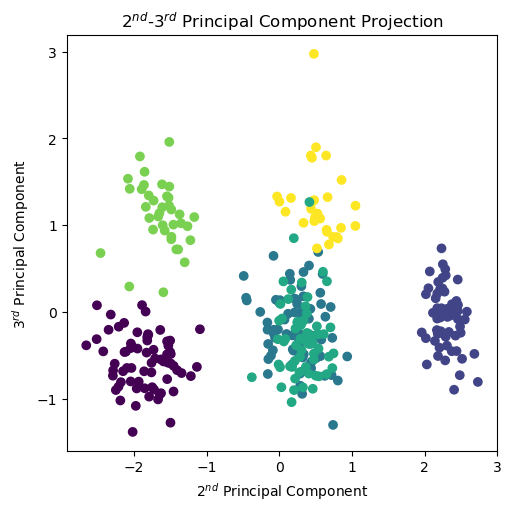

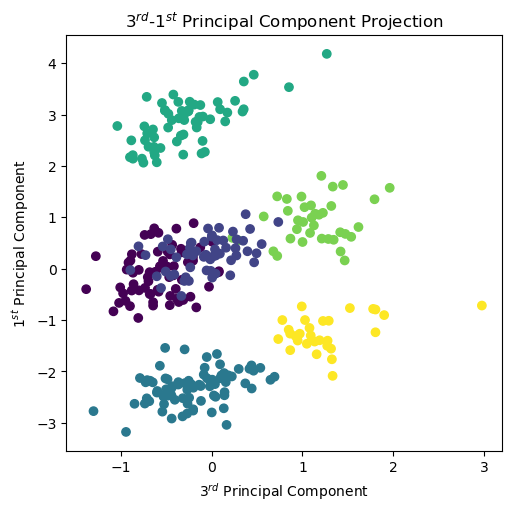

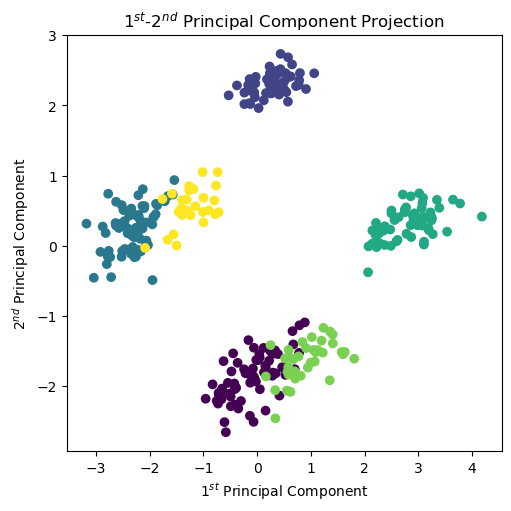

In [112]:
for i in range(0,3):
    fig = plt.figure(figsize = (5, 5), constrained_layout=True)
    plt.scatter(pca_fit[:, i-2], pca_fit[:, i-1], c=km_best.labels_, cmap="viridis")
    if i == 0:
        plt.title("$2^{nd}$-$3^{rd}$ Principal Component Projection")
        plt.xlabel("$2^{nd}$ Principal Component")
        plt.ylabel("$3^{rd}$ Principal Component")
        plt.savefig(f'2_vs_3_PCproj.jpg')
    elif i == 1:
        plt.title("$3^{rd}$-$1^{st}$ Principal Component Projection")
        plt.xlabel("$3^{rd}$ Principal Component")
        plt.ylabel("$1^{st}$ Principal Component")
        plt.savefig(f'3_vs_1_PCproj.jpg')
    elif i == 2:
        plt.title("$1^{st}$-$2^{nd}$ Principal Component Projection")
        plt.xlabel("$1^{st}$ Principal Component")
        plt.ylabel("$2^{nd}$ Principal Component")
        plt.savefig(f'1_vs_2_PCproj.jpg')
    plt.show()

# Hierarchical Clustering

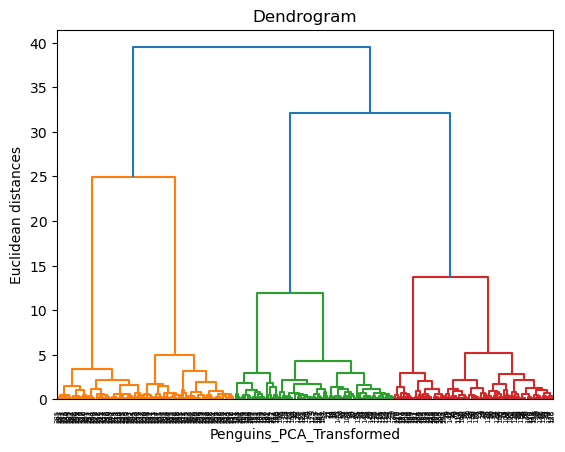

In [113]:
df_den = sch.dendrogram(sch.linkage(pca_fit, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Penguins_PCA_Transformed')
plt.ylabel('Euclidean distances')
plt.savefig('den.jpg')
plt.show()

In [114]:
name = list(df_den.keys())[0]
n_sch = len(df_den[name][0])

ac_sch = AgglomerativeClustering(n_clusters = n_sch, affinity = 'euclidean', linkage = 'ward')
fit_sch = ac_sch.fit_predict(pca_fit)

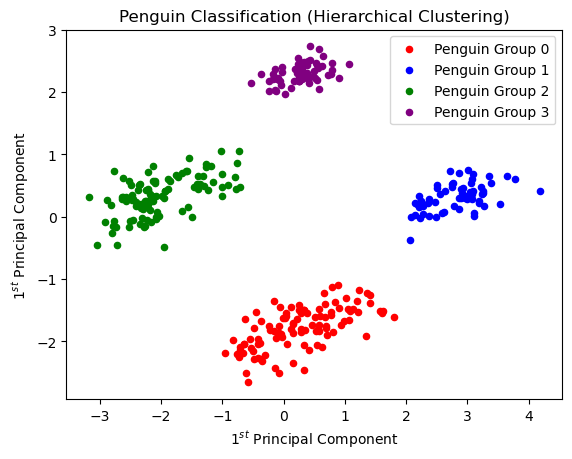

In [115]:
col = ['red', 'blue', 'green', 'purple']
for m in range(n_sch):
    plt.scatter(pca_fit[fit_sch == m, 0], pca_fit[fit_sch == m, 1], s = 20, c = col[m], label = f'Penguin Group {m}')
    
plt.title('Penguin Classification (Hierarchical Clustering)')
plt.xlabel('$1^{st}$ Principal Component')
plt.ylabel('$1^{st}$ Principal Component')
plt.legend()
plt.savefig('hc.jpg')
plt.show()

# DBSCAN

In [116]:
r_val = np.arange(0.15,0.85,0.05)
min_num = np.arange(2,7)
par = list(product(r_val, min_num))

num_clu = []
s_sc = []
for i in range(len(par)):
    DBS_clu = DBSCAN(eps=par[i][0], min_samples=par[i][1]).fit(pca_fit)
    num_clu.append(len(np.unique(DBS_clu.labels_)))
    s_sc.append(silhouette_score(pca_fit, DBS_clu.labels_))

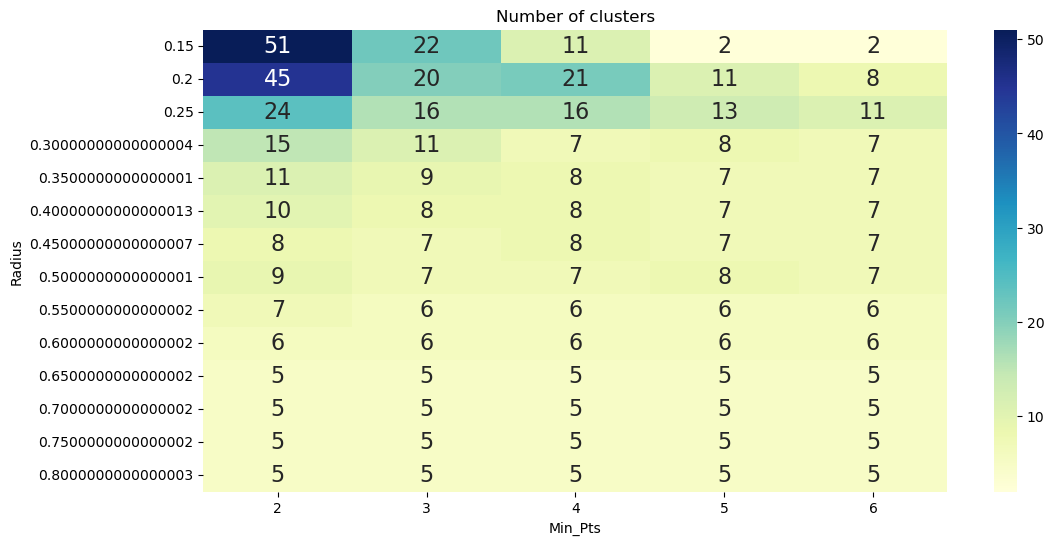

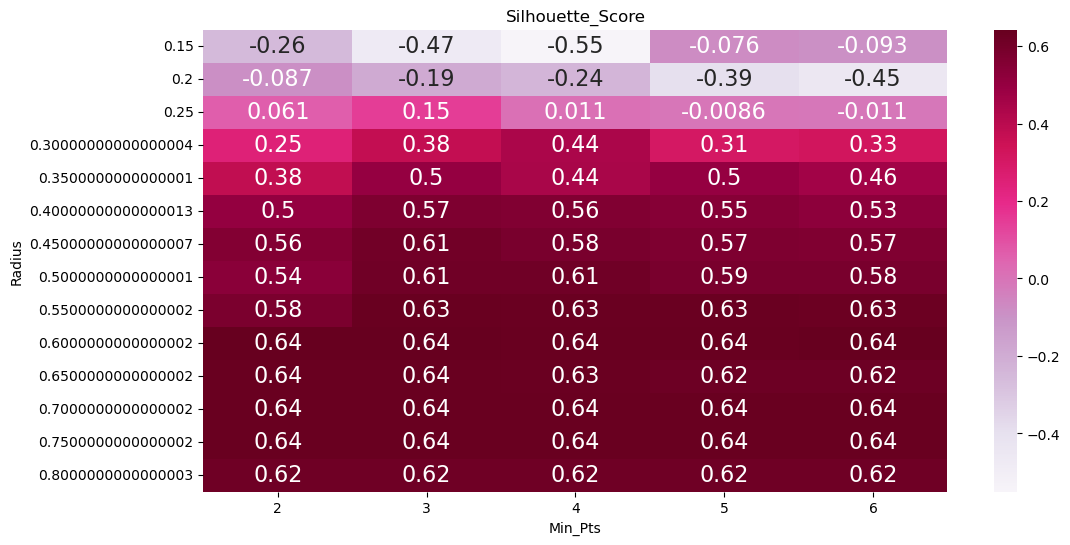

Number of Clusters =  5
Radius =  0.725
Minimum Points =  3


In [117]:
n_clu0 = pd.DataFrame.from_records(par, columns=['Radius', 'Min_Pts'])
n_clu0['Num_Clusters'] = num_clu
n_clu0['Silhouette_Score'] = s_sc

fig, ax = plt.subplots(figsize=(12,6))
pt0 = pd.pivot_table(n_clu0, values='Num_Clusters', index='Radius', columns='Min_Pts')
sns.heatmap(pt0, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.savefig('N_clusters_DBSCAN.jpg')
plt.show()

fig, ax = plt.subplots(figsize=(12,6))
pt1 = pd.pivot_table(n_clu0, values='Silhouette_Score', index='Radius', columns='Min_Pts')
sns.heatmap(pt1, annot=True,annot_kws={"size": 16}, cmap="PuRd", ax=ax)
ax.set_title('Silhouette_Score')
plt.savefig('Sil_score_DBSCAN.jpg')
plt.show()

print('Number of Clusters = ', 5)
print('Radius = ', (0.7+0.75)/2)
print('Minimum Points = ', 3)

In [118]:
DBS = DBSCAN(eps=0.725, min_samples=3).fit(pca_fit)

pca_fit_df = pd.DataFrame(pca_fit, columns=['First_Component','Second_Component','Third_Component'])
DBSCAN = pca_fit_df.copy()
DBSCAN.loc[:,'Cluster'] = DBS.labels_

In [119]:
DBSCAN_sizes = DBSCAN.groupby('Cluster').size().to_frame()
DBSCAN_sizes.columns = ["DBSCAN_size"]
DBSCAN_sizes

,DBSCAN_size
Cluster,
-1,2
0,106
1,106
2,58
3,60


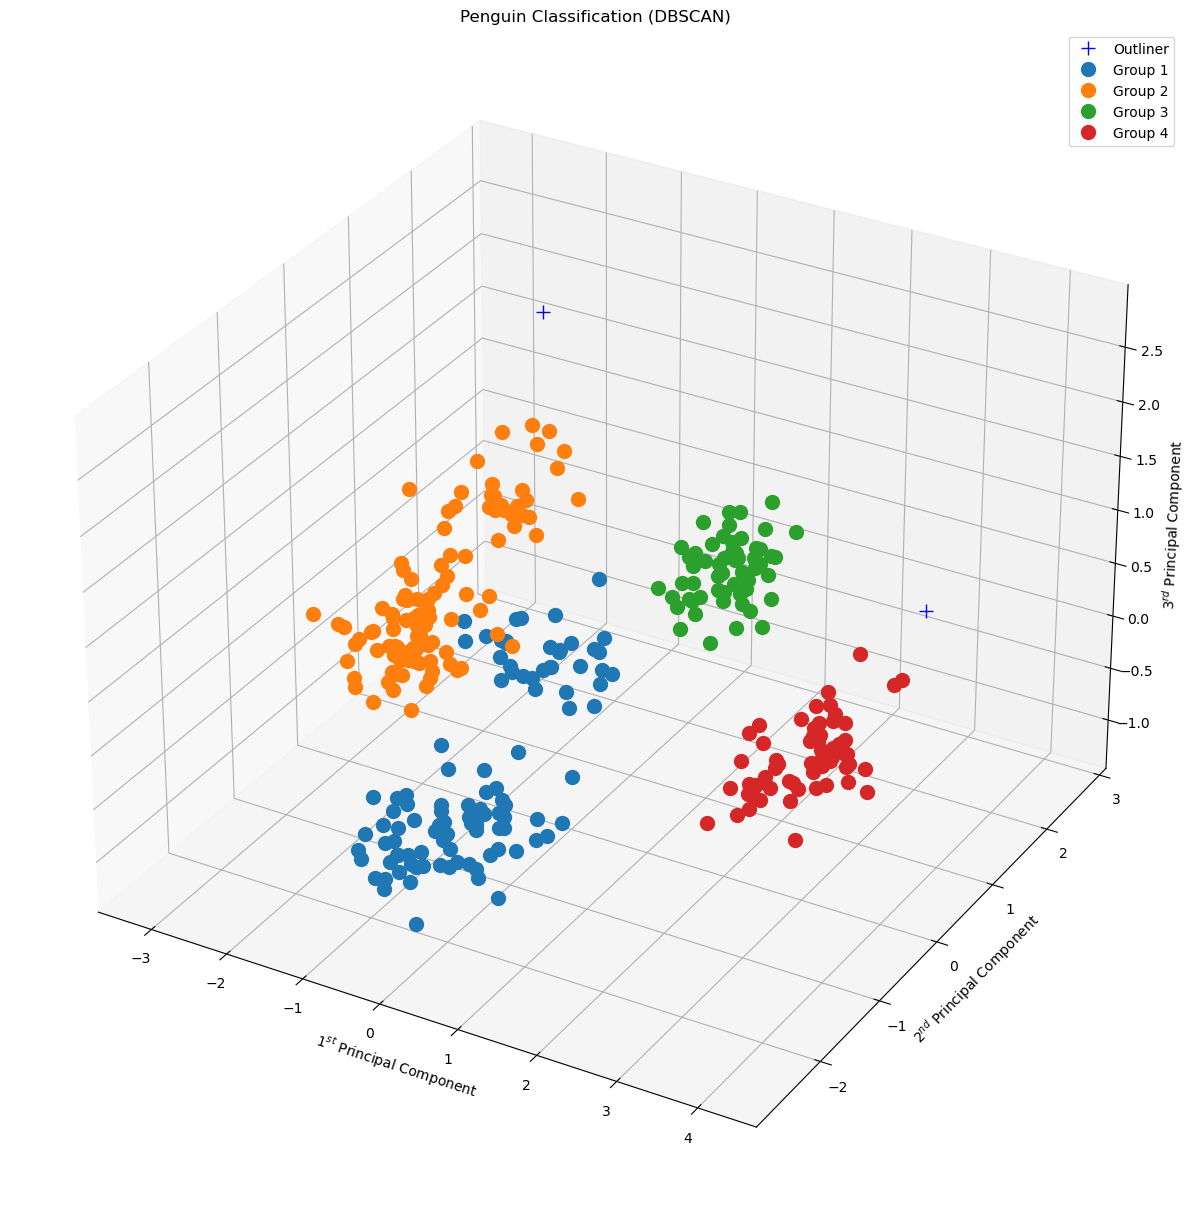

In [120]:
out=DBSCAN.loc[DBSCAN['Cluster']==-1]
g1=DBSCAN.loc[DBSCAN['Cluster']==0]
g2=DBSCAN.loc[DBSCAN['Cluster']==1]
g3=DBSCAN.loc[DBSCAN['Cluster']==2]
g4=DBSCAN.loc[DBSCAN['Cluster']==3]

fig = plt.figure(figsize = (12, 12), constrained_layout=True)
ax = fig.add_subplot(projection ="3d")

ax.plot(out['First_Component'], out['Second_Component'], out['Third_Component'], "b+", label="Outliner", markersize=10)
ax.plot(g1['First_Component'], g1['Second_Component'], g1['Third_Component'], "o", label="Group 1", markersize=10)
ax.plot(g2['First_Component'], g2['Second_Component'], g2['Third_Component'], "o", label="Group 2", markersize=10)
ax.plot(g3['First_Component'], g3['Second_Component'], g3['Third_Component'], "o", label="Group 3", markersize=10)
ax.plot(g4['First_Component'], g4['Second_Component'], g4['Third_Component'], "o", label="Group 4", markersize=10)

plt.legend(loc="upper right")

plt.title("Penguin Classification (DBSCAN)")

ax.set_xlabel("$1^{st}$ Principal Component")
ax.set_ylabel("$2^{nd}$ Principal Component")
ax.set_zlabel("$3^{rd}$ Principal Component")
plt.savefig('DBSCAN.jpg')
plt.show()